# Dimension Reduction Using PCA from Scikit-Learn
- Identify key featuers among customer base

## Data Sources
- churn_clean.csv: provided in WGU task prompt

In [1]:
import sys
print(sys.version)

## Imports

In [2]:
# Data handling package
import numpy as np
import pandas as pd
# Used in data prepartation for kmeans
from sklearn.preprocessing import StandardScaler
# Used in model building
from sklearn.decomposition import PCA
# Used for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [3]:
# Import full data set
df = pd.read_csv('churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# List Continuous Features to Keep
keep_list =['Age', 'Income', 'Outage_sec_perweek', 'Tenure', 
            'MonthlyCharge', 'Bandwidth_GB_Year']

# Create new DataFrame using desired features
df_num = df[keep_list]

# Standardize the Features
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Export to csv
df_std.to_csv('churn_prepared.csv', index=False)

df_std.head()

,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.720925,-0.398778,-0.679978,-1.048746,-0.003943,-1.138487
1,-1.259957,-0.641954,0.570331,-1.262001,1.630326,-1.185876
2,-0.148730,-1.070885,0.252347,-0.709940,-0.295225,-0.612138
3,-0.245359,-0.740525,1.650506,-0.659524,-1.226521,-0.561857
4,1.445638,0.009478,-0.623156,-1.242551,-0.528086,-1.428184


## Model Building

In [5]:
# Instantiate a PCA Object
pca = PCA()

# Fit and transform the data
df_pca = pd.DataFrame(pca.fit_transform(df_std),
                      columns=['pc1','pc2','pc3','pc4','pc5','pc6'])

df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.549624,0.183757,0.950359,-0.365419,-0.251148,-0.047707
1,-1.664572,-1.588061,-0.965289,0.203493,-1.308943,-0.050242
2,-0.949043,-0.386374,-0.197328,-1.050343,0.005160,0.079540
3,-0.906591,-0.569056,-1.027522,-1.066330,1.494940,0.119667
4,-1.909291,0.553598,1.447955,-0.210376,0.492330,-0.075630


## Model Evaluation

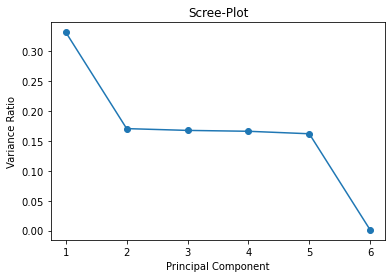

In [6]:
# Create empty lists to store plot values
variance = []
components = []
x = 1

# Fill the lists
for i in pca.explained_variance_ratio_:
    variance.append(i)
    components.append(x)
    x += 1

# Plot variance to find the elbow of the lineplot
plt.plot(components, variance, '-o')
plt.title('Scree-Plot')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.xticks(components)
plt.show();

In [7]:
# Show the variance ratio for each principal component
pca_list = ['1','2','3','4','5','6']

pc_df = pd.DataFrame(list(zip(pca_list, pca.explained_variance_ratio_)), columns=['PC', 'Variance_Ratio'])
pc_df

,PC,Variance_Ratio
0,1,0.332198
1,2,0.170724
2,3,0.167734
3,4,0.166266
4,5,0.162089
5,6,0.000988


In [8]:
# What is the total variance captured by the first 3 components
pc_df[:3].sum()

PC                123.000000
Variance_Ratio      0.670657
dtype: float64